In [2]:
## for Jupyter Notebook remove the # from the following line and add # in front of all subsequent lines in this cell
# from vega import VegaLite 

## For JupyterLab uncomment the following lines
from IPython.display import display
def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v3+json'] = spec
    display(bundle, raw=True)


# Datenvisualisierung mit der Grammar of Graphics
Am Beispiel von Vega-Lite

![](structure.png)

Dokumentation:

https://vega.github.io/vega-lite/docs/

Beispiele:

https://vega.github.io/vega-lite/examples/

Quellen:

* https://www.kaggle.com/the-guardian/olympic-games/version/1#winter.csv
* http://www.espn.com/espn/page2/sportSkills

Autoren: 

* Jonas Oesch
* Marco Soldati

## 0. Daten anschauen

Sie verwenden in allen Übungen den gleichen Datensatz. Es sind die Medaillengewinner der Olympischen Spiele mit verschiedenen Attributen wie Land, Sport, wieviel Stärke oder Ausdauer die Sportart benötigt oder welches Geschlecht der Medaillengewinner resp. die -gewinnerin hat.

Laden Sie als erstes die Daten herunter und machen Sie sich mit dem Datensatz vertraut:

* https://gist.github.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243

## 1. Olympische Spiele

Visualisieren Sie, die Jahre in denen Olympische Spiele stattgefunden haben. Machen Sie sich gut mit der Struktur vertraut, die genutzt wird, um die Visualisierung zu definiern. Sie ist die Basis für alle folgenden Übungen.

Im `encoding`-Teil wird definiert, welche Daten aus der Tabelle in welchem Channel/Encoding dargestellt werden. Wir beschränken uns am Anfang auf eine x-Achse. (die Liste mit allen möglichen Channeln/Encodings: https://vega.github.io/vega-lite/docs/encoding.html)

`type` entspricht den Attribut-Typen aus der Theorie. In Vega-Lite sind folgende möglich:

* `nominal`
* `ordinal`
* `quantitative`

Ausserdem biete Vega-Lite noch `temporal` für Zeitreihen.
(Dokumentation: https://vega.github.io/vega-lite/docs/type.html)

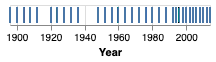

In [3]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "tick",
    "encoding": {      
        "x": {
            "field": "Year",
            "type": "temporal",
        }
    }
})

## 2. Sommer- und Winterspiele

Unterscheiden Sie zwischen Sommer- und Winterspielen im Farb-Channel. Das entsprechende Feld heisst `Season`.

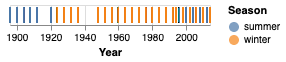

In [4]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "tick",
    "encoding": {      
        "x": {
            "field": "Year",
            "type": "temporal",
        },
        "color": {
            "field": "Season",
            "type": "nominal"
        }
    }
})

## 3. Makeover

Wie Sie vielleicht vermuten, verdecken nun die Winterspiele zwischen 1924 und 1990 die Sommerspiele. Machen Sie beide sichtbar, indem Sie Sommer- und Winterspiele auf der Y-Achse neu positionieren. Dazu verwenden sie im `encoding`-Teil einen neuen Channel `y` und füllen diesen analog zu `x` und `color` aus.

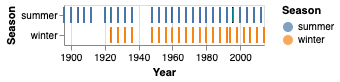

In [5]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "tick",
    "encoding": {      
        "x": {
            "field": "Year",
            "type": "temporal",
        },
        "color": {
            "field": "Season",
            "type": "nominal"
        },
        "y" : {
            "field": "Season",
            "type": "nominal"            
        }
    }
})

## 4. Medaillen

Es ist an der Zeit einen neuen Chart-Typen auszuprobieren: den *Bar-Chart*. Dazu setzen Sie `mark` auf `bar`. Um etwas zu erhalten, dass sich auf der Y-Achse darstellen lässt, zählen Sie die Einträge pro Jahr. Eine Datentransformation also. Ein Beispiel wie das gemacht wird, finden Sie hier: https://vega.github.io/vega-lite/examples/histogram.html

Beachten Sie auch die angepasste Breite mit dem `width`-Eintrag. Analog gibt es natürlich auch einen `height`-Eintrag: https://vega.github.io/vega-lite/docs/spec.html#single

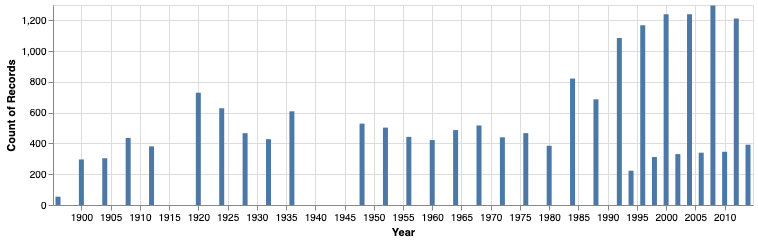

In [6]:
VegaLite({
    "data": {
        "url": "https://gist.githubusercontent.com/marcosoldati/37b652aff7476c6ab77f16f4f808b243/raw/6c2125013811db238170f5dc0d728e858e40989d/olympics.csv"
    },
    "mark": "bar",
    "width": 700,
    "encoding": {
        "x": {
            "field": "Year",
            "type": "temporal",
        },
        "y": {
            "aggregate": "count",
            "type": "quantitative"
        }
    }
})